<a href="https://colab.research.google.com/github/matiusbetho/Image-Classification/blob/main/Images_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" membuat program kalsifikasi images dengan mechine learning"""
##################################################################
""" Memasukan Library kedalan Python """
import tensorflow as tf
# TensorFlow adalah kerangka mechine learning
from tensorflow import keras
# Memanggil KERAS dari module tensorflow
from keras.models import Sequential
# memasukkan fungsional sequential dari module keras.model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
# memasukkan fungsional Dense, Flatten, Conv2D, MaxPooling2D, Dropout dari module keras.layer
from tensorflow.keras import layers
# memasukkan fungsionalitas layer dari module tensorflow.keras
from keras.utils import to_categorical
# memasukkan fungsional to_categorical dari module keras.utils
import numpy as np
# memasukkan module numpy
import matplotlib.pyplot as plt
# memasukkan module matplotlib.pypllot
plt.style.use('fivethirtyeight')

In [ ]:
# memasukkan data set yang sudah disediakan oleh KERAS
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()
# Sebuah perintah untuk memasukkan data set pada training dan test  

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#Melihat tipe data pada training dan test dataset
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# melihat ukuran dari array pada training dan test dataset
print("x_train shape :" ,x_train.shape)
print("y_train shape :" ,y_train.shape)
print("x_test shape :" ,x_test.shape)
print("y_test shape :" ,y_test.shape)

x_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
x_test shape : (10000, 32, 32, 3)
y_test shape : (10000, 1)


In [ ]:
"""
(50000, 32, 32, 3) artinya mempunya 5000 data dan memuat gambar ukuran 32*32 dengan kedalaman warna 3 bit
(50000, 1) artinya mempunyai 5000 data dan memuat 1 warna
"""

'\n(50000, 32, 32, 3) artinya mempunya 5000 data dan memuat gambar ukuran 32*32 dengan kedalaman warna 3 bit\n(50000, 1) artinya mempunyai 5000 data dan memuat 1 warna\n'

In [ ]:
# memuat gambar pada data set gambar pertama dalam bentuk array 
index = 5
x_train[index]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

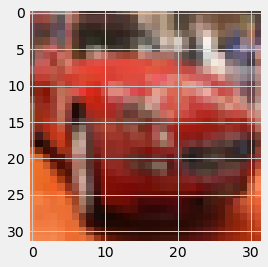

In [ ]:
# memuat gambar pertama pada data set sebagai gambar
img = plt.imshow(x_train[index])

In [ ]:
# mendapatkan label pada gambar 
print('image label :',y_train[index])

image label : [1]


In [ ]:
# mengklasifikasi images berdasarkan indeks
classification = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#menampilkan
print('Klasifikasi gambar : ', classification[y_train[index][0]])

Klasifikasi gambar :  deer


In [ ]:
# mengubah label data set menjadi input pada neural network berjumlah 10 input
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# menampilkan label yang sudah dijadikan input
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
""" pada setiap label akan diubah kedalam sebuah vektor yang berisi 10 nilai dengan 
setiap kolom bernilai 0 kecuali 1 kolom bernilai "1" yang menandakan identitas
"""

' pada setiap label akan diubah kedalam sebuah vektor yang berisi 10 nilai dengan \nsetiap kolom bernilai 0 kecuali 1 kolom bernilai "1" yang menandakan identitas\n'

In [ ]:
# menampilkan label saat ini 
print(y_train_one_hot[index])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# mengkonvert pixel gamabr pada data set menjadi nilai float antara 0 sampai 1
x_train = x_train /255
x_test = x_test / 255
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
# membuat model arsitektur
model = Sequential()

# menambahkan layer 1
model.add(Conv2D(32,(5,5), activation='relu',input_shape=(32,32,3)))

# menambahkan layer pooling 1
model.add(MaxPooling2D(pool_size=(2,2)))

# menambahkan layer 2
model.add(Conv2D(32,(5,5), activation='relu'))

# menambahkan layer pooling 2
model.add(MaxPooling2D(pool_size=(2,2)))

# menambahkan flattening layer
model.add(Flatten())

# menambahkan layer dengan 1000 neuron
model.add(Dense(1000, activation='relu'))

# Menambahkan drop out layer
model.add(Dropout(0.5))

# menambahkan layer dengan 500 neuron
model.add(Dense(500, activation='relu'))

# Menambahkan drop out layer
model.add(Dropout(0.5))

# menambahkan layer dengan 250 neuron
model.add(Dense(250, activation='relu'))

# menambahkan layer dengan 10 neuron
model.add(Dense(10, activation='softmax'))

In [ ]:
# mengcompile model 
model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics = ['accuracy'])
 

In [ ]:
#train model
hist = model.fit(x_train,y_train_one_hot,
                 batch_size=256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 2s 11ms/step - loss: 1.8272 - accuracy: 0.3115 - val_loss: 1.5106 - val_accuracy: 0.4393
Epoch 2/10
157/157 [==============================] - 1s 9ms/step - loss: 1.4447 - accuracy: 0.4685 - val_loss: 1.3370 - val_accuracy: 0.5068
Epoch 3/10
157/157 [==============================] - 1s 9ms/step - loss: 1.3063 - accuracy: 0.5287 - val_loss: 1.2140 - val_accuracy: 0.5630
Epoch 4/10
157/157 [==============================] - 1s 9ms/step - loss: 1.1976 - accuracy: 0.5671 - val_loss: 1.2701 - val_accuracy: 0.5615
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 1.1346 - accuracy: 0.5933 - val_loss: 1.1213 - val_accuracy: 0.6018
Epoch 6/10
157/157 [==============================] - 1s 9ms/step - loss: 1.0619 - accuracy: 0.6196 - val_loss: 1.0570 - val_accuracy: 0.6256
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 1.0020 - accuracy: 0.6440 - val_loss: 1.0517 - val_accuracy: 0.6309
Epoch

In [ ]:
# menampilkan hasil tingkat akurasi model 
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.9673 - accuracy: 0.6652


0.6651999950408936

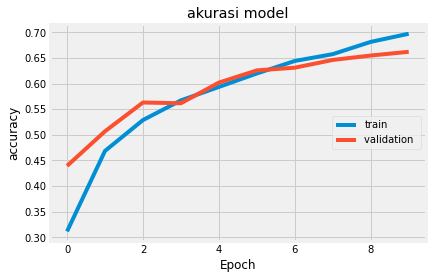

In [ ]:
# ploting akurasi dalam grafik 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('akurasi model')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation '],loc='center right')
plt.show()

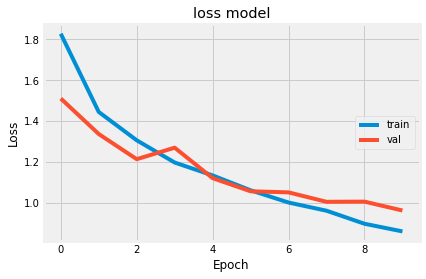

In [ ]:
# ploting loss dalam grafik 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='center right')
plt.show()